In [1]:
from IPython.core.display import SVG



import pandas as pd

import yaml

In [2]:
%run imho

In [3]:
with open("style.yaml") as stream:
    try:
        style = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

In [4]:
relations = pd.read_csv('rdsv/rdsv-20250131.csv')

In [16]:
relations = relations.dropna(subset='verb')

In [17]:
hege_raw = None

with open("rdsv/rdsv-20241212.yaml") as stream:
    try:
        hege_raw = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

In [18]:
hege_raw

{'relation-types': [{'owns': {'subject': 'person'}},
  {'governs': {'subject': 'institution'}},
  {'implements': {'object': 'standard'}},
  {'creates': {'subject': 'person', 'object': 'information'}},
  {'operates': {'subject': 'corporaton', 'object': 'machine'}}],
 'relations': [{'subject': 'People', 'verb': 'transform', 'object': 'Science'},
  {'subject': 'Design', 'verb': 'creates', 'object': 'Bias'},
  {'subject': 'Incentives', 'verb': 'creates', 'object': 'Bias'},
  {'subject': 'Regulators', 'verb': 'lacks', 'object': 'Capacity'},
  {'subject': 'Technology', 'verb': 'enables', 'object': 'Capacity Building'},
  {'subject': 'Shared Interest', 'verb': 'drives', 'object': 'Collaboration'},
  {'subject': 'Corporates', 'verb': 'escapes', 'object': 'Compliance'},
  {'subject': 'Regulators', 'verb': 'should measure', 'object': 'Compliance'},
  {'subject': 'Regulators', 'verb': 'should inform', 'object': 'Consumers'},
  {'subject': 'AI Explainability',
   'verb': 'enables',
   'object': 'C

In [19]:
G = data_to_graph(style, relations)

In [20]:
list(G.nodes())

['real world data',
 'software artifact',
 'design choices',
 'social impact',
 'bias',
 'sponsorship',
 'research directions',
 'regulators',
 'capacity',
 'regulations',
 'covered entities',
 'technology',
 'shared interest',
 'collaboration',
 'compliance protocols',
 'consumer protection',
 'compliance',
 'consumers',
 'AI explainability',
 'effective conversation',
 'policy problems more tractable',
 'AI training',
 'supply chain of data',
 'behavior model',
 'intervetions',
 'corporations',
 'regulation',
 'monopoly',
 'lobbyists',
 'data',
 'measurement',
 'countries',
 'what they produce',
 'economy',
 'society',
 'economic forecasting',
 'shared belief',
 'environment',
 'future',
 'inherent pluralities',
 'geopolitical strategy',
 'government',
 'oversight on how regulations are implemented',
 'data to make policies',
 'development',
 'interventions on the economy',
 'institutions',
 'incentives',
 'research',
 'grand challenge',
 'researchers in one direction',
 'law',
 'tec

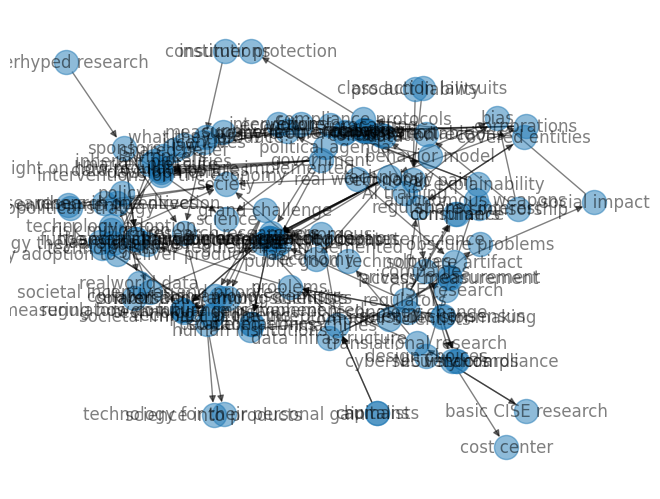

In [21]:
nx.draw_kamada_kawai(G, with_labels=True, alpha = 0.5)

In [22]:
graphviz_lookup('content', style)

{'shape': 'note'}

In [23]:
imho_dot = imho_graph_to_dot(G, style, layout = 'dot')

In [24]:
imho_dot

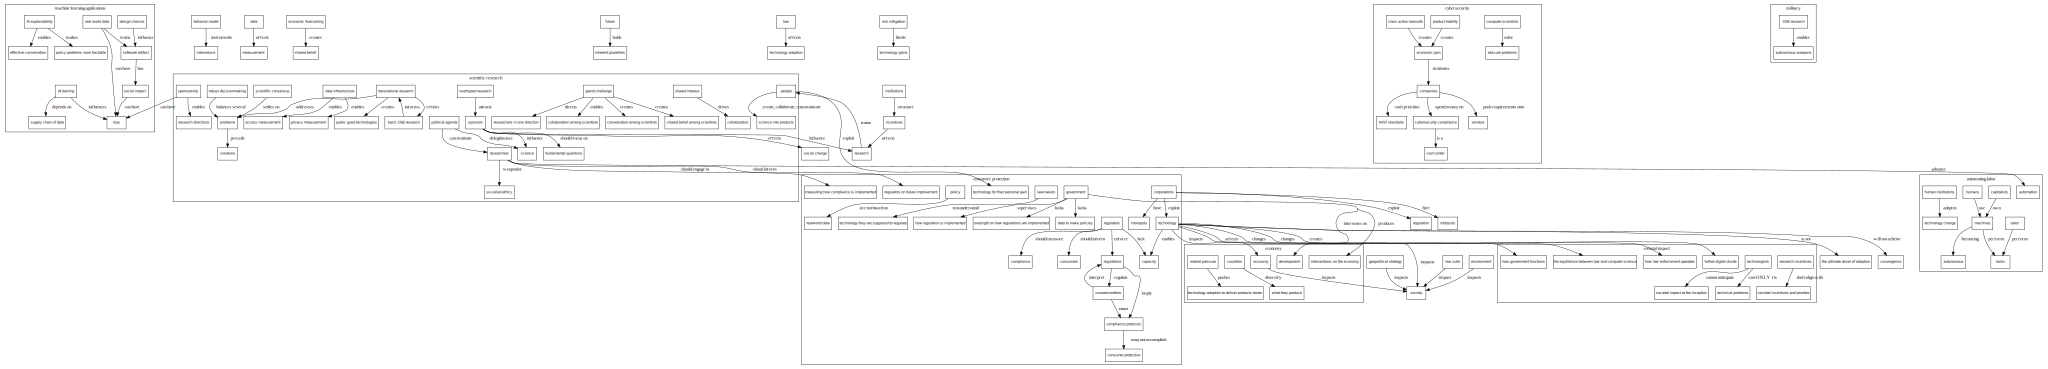

In [25]:
SVG(data = imho_dot.create_svg())

In [26]:
imho_dot.write_png('rdsv-20250131.png')